In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dados = pd.read_csv('./MICRODADOS_ENEM_2022.csv', sep=';', encoding='ISO-8859-1')
dados.dropna(inplace=True)
dados.reset_index(drop=True, inplace=True)

In [3]:
target = dados.NU_NOTA_MT
nota_humanas = dados.NU_NOTA_CH
sexo = dados.TP_SEXO
cor_raca = dados.TP_COR_RACA
renda = dados.Q006
treineiro = dados.IN_TREINEIRO

In [4]:
cor_raca = pd.Categorical(cor_raca)
renda = pd.Categorical(renda)
treineiro = pd.Categorical(treineiro)
cor_raca = cor_raca.rename_categories(['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])
renda = renda.rename_categories([
    'Nenhuma Renda', 
    'Até R$ 1.212,00', 
    'De R$ 1.212,01 até R$ 1.818,00',
    'De R$ 1.818,01 até R$ 2.424,00',
    'De R$ 2.424,01 até R$ 3.030,00',
    'De R$ 3.030,01 até R$ 3.636,00',
    'De R$ 3.636,01 até R$ 4.848,00',
    'De R$ 4.848,01 até R$ 6.060,00',
    'De R$ 6.060,01 até R$ 7.272,00',
    'De R$ 7.272,01 até R$ 8.484,00',
    'De R$ 8.484,01 até R$ 9.696,00',
    'De R$ 9.696,01 até R$ 10.908,00',
    'De R$ 10.908,01 até R$ 12.120,00',
    'De R$ 12.120,01 até R$ 14.544,00',
    'De R$ 14.544,01 até R$ 18.180,00',
    'De R$ 18.180,01 até R$ 24.240,00',
    'Acima de R$ 24.240,00'
])
treineiro = treineiro.rename_categories(['Não', 'Sim'])

dados['TP_COR_RACA'] = cor_raca
dados['Q006'] = renda
dados['IN_TREINEIRO'] = treineiro

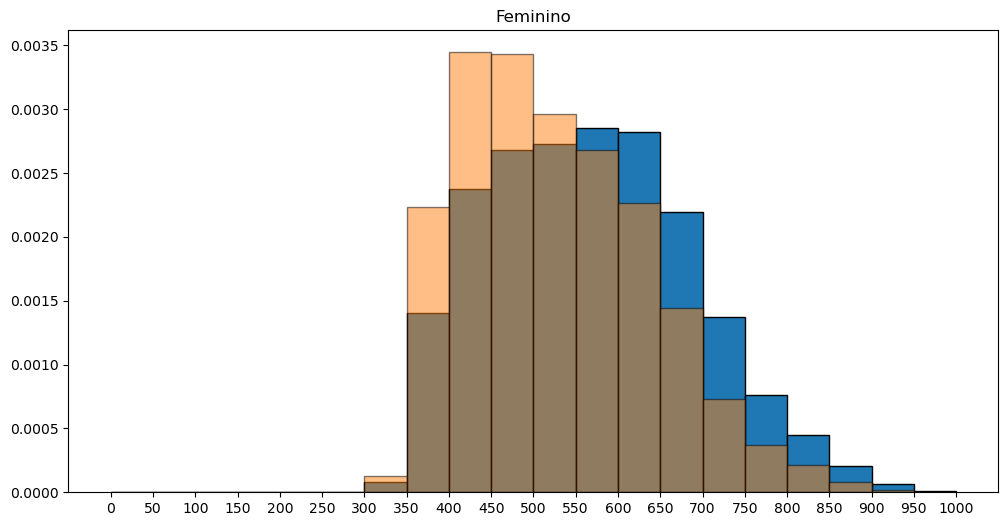

In [5]:
nota_mat_masc = dados.loc[dados.TP_SEXO == 'M', 'NU_NOTA_MT']
nota_mat_fem = dados.loc[dados.TP_SEXO == 'F', 'NU_NOTA_MT']

amp = np.linspace(0, 1000, 21)
plt.figure(figsize=(12, 6))
# plt.subplot(211)
plt.hist(nota_mat_masc, bins=amp, edgecolor='black', density=True)
plt.title('Masculino')
plt.xticks(amp)
# plt.subplot(212)
plt.hist(nota_mat_fem, bins=amp, edgecolor='black', density=True, alpha=0.5)
plt.title('Feminino')
plt.xticks(amp)
plt.show()

In [21]:
dados.groupby('TP_SEXO').describe()['NU_NOTA_MT'].T.apply(lambda x: x.round(2))

TP_SEXO,F,M
count,1436668.00,908155.00
mean,526.70,567.78
std,109.86,120.79
min,0.00,0.00
25%,438.70,471.50
50%,512.20,563.00
75%,602.30,651.10
max,985.70,985.70


In [28]:
target.corr(nota_humanas)

0.6214242815018317

/tmp/ipykernel_3397/3171102916.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target.hist(cor_raca, edgecolor='black', density=True)


<Figure size 2000x600 with 0 Axes>

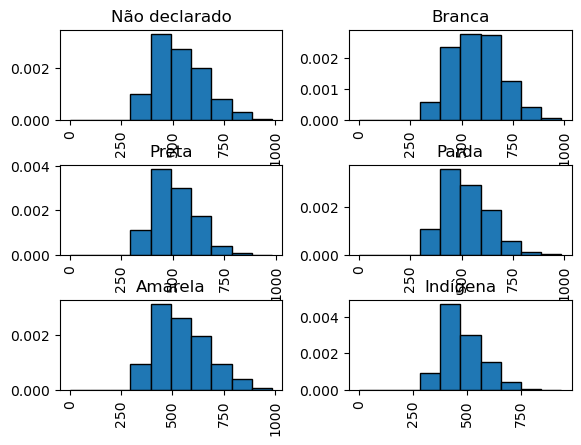

In [33]:
dados.groupby('TP_COR_RACA').describe()['NU_NOTA_MT'].T.apply(lambda x: x.round(2))